 <div align = center>
    <h1>Funnel Analysis E-commerce</h1>
 </div>

Funnel analysis adalah metode analisis data yang digunakan untuk memahami perjalanan pengguna melalui berbagai tahapan dalam sebuah proses atau alur, seperti pembelian, pendaftaran, atau penggunaan layanan. Dalam funnel analysis, tahapan ini direpresentasikan sebagai serangkaian langkah yang disusun dari awal hingga akhir tujuan yang diharapkan. Interpretasi funnel analysis melibatkan pemahaman bagaimana pengguna berpindah dari satu tahapan ke tahapan berikutnya, serta identifikasi di mana pengguna keluar (drop-off) sebelum mencapai tujuan akhir.

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="#">Import Library</a>
    <li><a href="#">Import Dataset</a>
    <li><a href="#">Data Understanding</a>
    <li><a href="#">Data Preprocessing</a>
        <ul>
            <li><a href="#">Identify missing values</a></li>
            <li><a href="#">Deal with missing values</a></li>
            <li><a href="#">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="#">Data Visualization</a></li>
    <li><a href="#">Conclusion</a></li>
</ul>
    
</div>
 
<hr>

# Import Library

In [13]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

# Import Dataset

In [3]:
path = '../data/user_data.csv'
df = pd.read_csv(path)

In [4]:
df.head()

,user_id,stage,conversion
0,user_0,homepage,True
1,user_1,homepage,True
2,user_2,homepage,True
3,user_3,homepage,True
4,user_4,homepage,True


# Data Understanding

In [9]:
df.shape

(17175, 3)

Berdasarkan data terdapat 17175 user yang melakukan kunjungan ke aplikasi E-Commerce kita

In [7]:
df.columns

Index(['user_id', 'stage', 'conversion'], dtype='object')

Terdapat 3 kolom pada dataset ini yaitu,
1. `user_id` merupakan ID dari setiap user,
2. `stage` merupakan tahapan yang dilakukan oleh user,
3. `conversion` merupakan pengunjung atau calon pelanggan yang melakukan tindakan yang diinginkan

In [8]:
df['stage'].unique()

array(['homepage', 'product_page', 'cart', 'checkout', 'purchase'],
      dtype=object)

### Ringkasan Funnel:

1. **Homepage**: Tempat pertama pengunjung tiba dan melihat gambaran umum.
2. **Product Page**: Pengunjung melihat produk lebih mendalam.
3. **Purchase**: Pengunjung memutuskan untuk membeli produk dan memasukkannya ke dalam **cart**.
4. **Checkout**: Pengunjung mengisi detail pengiriman dan pembayaran untuk menyelesaikan transaksi.
5. **Cart**: Keranjang belanja tempat pelanggan mengecek dan menyelesaikan pembelian mereka.


# Data Preprocessing

## Checking null value

In [9]:
missing_data = df.isnull()

In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

user_id
user_id
False    17175
Name: count, dtype: int64

stage
stage
False    17175
Name: count, dtype: int64

conversion
conversion
False    17175
Name: count, dtype: int64



Berdasarakn pengecekan, tidak terdapat Null value pada dataset

## Checking Data Type

In [12]:
df.dtypes

user_id       object
stage         object
conversion      bool
dtype: object

Berdasarkan pengecekan tipe data, menunjukan bahwa tipe data sudah sesuai

# Data Visualization

<Axes: title={'center': 'Funnel Analysis Stages'}, ylabel='stage'>

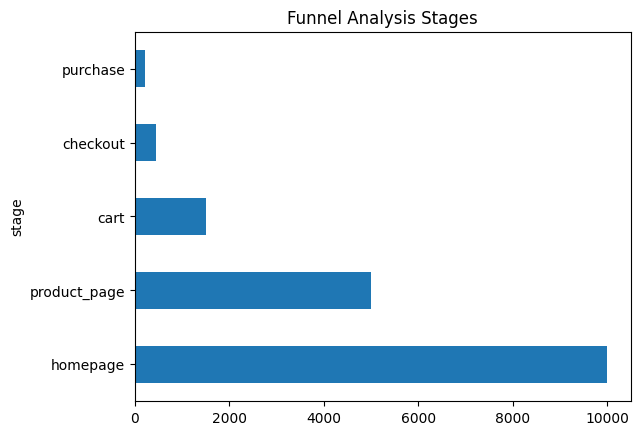

In [15]:
df["stage"].value_counts().plot.barh(title='Funnel Analysis Stages')

In [24]:
dfcr = df.groupby('stage').count()['conversion'].reset_index().sort_values(by='conversion', ascending=False)

In [25]:
dfcr

,stage,conversion
2,homepage,10000
3,product_page,5000
0,cart,1500
1,checkout,450
4,purchase,225


In [28]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y = ["homepage", "product_page", "purchase", "checkout", "cart"],
    x = [10000, 5000, 1500, 450, 225],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
    "line": {"width": [5, 3, 3, 4, 2, 2], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 1}})
    )

fig.show()

# Conclusion

#### Homepage
* Dari hasil campaign yang dilakukan melalui berbagai saluran, termasuk posting media sosial, iklan digital, dan promosi lainnya, tercatat ada **10.000** orang yang mengunjungi aplikasi atau website e-commerce hingga sampai ke **homepage**. 
* Ini menunjukkan keberhasilan awal dalam menarik minat pengguna terhadap campaign tersebut. 
* Namun, kunjungan ini hanyalah langkah pertama dalam perjalanan pelanggan, yang menunjukkan adanya potensi untuk meningkatkan konversi lebih lanjut di tahap berikutnya.




#### Product_page

* Dari **10.000** orang yang mengunjungi e-commerce kita, hanya **5.000** orang yang tertarik untuk melanjutkan ke halaman **product_page**. 
* Ini menunjukkan adanya penurunan sebesar **50%**, yang berarti separuh dari total pengunjung tidak melanjutkan untuk melihat detail produk.

**Penyebab penurunan ini bisa disebabkan oleh beberapa faktor, seperti:**
1. Tampilan halaman utama yang kurang menarik.
2. Navigasi yang rumit.
3. Kampanye iklan yang tidak sepenuhnya relevan dengan produk yang ditawarkan.

Hal ini menandakan adanya ruang untuk perbaikan di tahap awal pengalaman pengguna, seperti:
- Peningkatan **UX/UI** pada halaman landing.
- Penyajian informasi yang lebih jelas dan menarik.


#### Purchase

* Dari **5.000** orang yang mengunjungi halaman **product_page**, hanya **1.500** orang yang akhirnya melanjutkan untuk melakukan **purchase**. 
* Ini menunjukkan bahwa **30%** pengunjung dari **product_page** melakukan konversi atau bertransaksi dengan melanjutkan ke tahap **purchase**. 
* Namun, pada tahap ini terjadi penurunan sebesar **70%**, yang berarti **70%** dari pengunjung halaman **product_page** tidak melanjutkan untuk melakukan **purchase**.

**Penyebab penurunan ini dapat disebabkan oleh beberapa alasan, seperti:**

1. Tidak menemukan produk yang sesuai dengan kebutuhan.
2. Tidak tertarik dengan harga atau penawaran yang ada.
3. Pengalaman pengguna yang kurang memuaskan di halaman produk.
4. Keraguan atau kebingungan dalam proses **purchase**.


#### Checkout

* Dari **1.500** orang yang melakukan **purchase**, hanya **450** orang yang melanjutkan untuk melakukan **checkout**.
* Ini menunjukkan bahwa **30%** pengunjung dari **purchase** melakukan konversi dengan melanjutkan ke tahap **checkout**.
* Namun, pada tahap ini terjadi penurunan sebesar **70%**, yang mengartikan bahwa **70%** dari halaman **purchase** tidak melanjutkan untuk melakukan **checkout**.

**Faktor-faktor yang mungkin mempengaruhi penurunan pada tahap ini antara lain:**

1. **Proses checkout yang rumit**: Pengguna mungkin merasa proses checkout terlalu panjang atau kompleks, yang menyebabkan mereka meninggalkan pembelian.
2. **Biaya tambahan yang tidak diharapkan**: Biaya pengiriman atau pajak yang tidak terlihat sejak awal bisa mengejutkan pelanggan dan mendorong mereka untuk membatalkan checkout.
3. **Keraguan tentang keamanan transaksi**: Pengunjung mungkin merasa tidak aman mengenai metode pembayaran yang tersedia atau informasi pribadi mereka yang diminta pada saat checkout.
4. **Pengalaman pengguna yang buruk**: Halaman checkout yang tidak responsif atau sulit diakses di perangkat mobile dapat mengurangi konversi.
5. **Pilihan metode pembayaran yang terbatas**: Tidak adanya metode pembayaran yang sesuai dengan preferensi pelanggan dapat menghalangi mereka untuk menyelesaikan pembelian.


#### Cart

* Dari **450** orang yang melakukan **checkout**, hanya **255** orang yang melanjutkan untuk melakukan **cart**.
* Ini menunjukkan bahwa **50%** pengunjung dari **checkout** melakukan konversi dengan melanjutkan ke tahap **cart**.
* Namun, pada tahap ini terjadi penurunan sebesar **50%**, yang mengartikan bahwa **50%** dari halaman **checkout** tidak melanjutkan untuk melakukan **cart**.

**Faktor-faktor yang mungkin mempengaruhi penurunan pada tahap ini antara lain:**

1. **Keterlambatan dalam pemrosesan**: Pengunjung yang tidak dapat dengan cepat melanjutkan ke tahap **cart** mungkin kehilangan minat karena halaman tidak cukup responsif.
2. **Ketersediaan stok produk**: Beberapa produk mungkin tidak tersedia lagi setelah checkout dilakukan, yang menyebabkan pengunjung membatalkan.
3. **Proses verifikasi yang tidak jelas**: Ketidakjelasan dalam verifikasi pembayaran atau konfirmasi barang di **cart** dapat menurunkan minat pelanggan untuk menyelesaikan pembelian.
4. **Preferensi pembayaran yang terbatas**: Pengguna yang tidak menemukan metode pembayaran yang diinginkan pada tahap **cart** bisa membatalkan transaksi.


# Author
Prada Dipa